___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('/Users/faizralvi/Documents/Mentoring/WEEK 6/kyphosis.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/faizralvi/Documents/Mentoring/WEEK 6/kyphosis.csv'

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

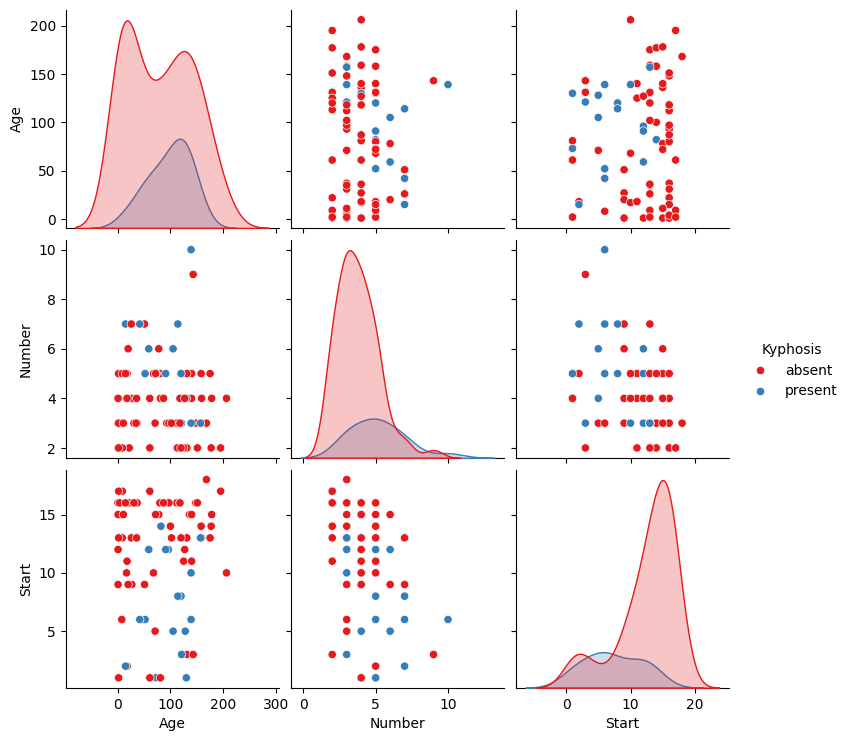

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Decision Trees

We'll start just by training a single decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

Let's evaluate our decision tree.

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.64      0.72        14
     present       0.17      0.33      0.22         3

    accuracy                           0.59        17
   macro avg       0.49      0.49      0.47        17
weighted avg       0.70      0.59      0.63        17



In [ ]:
print(confusion_matrix(y_test,predictions))

[[9 5]
 [2 1]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

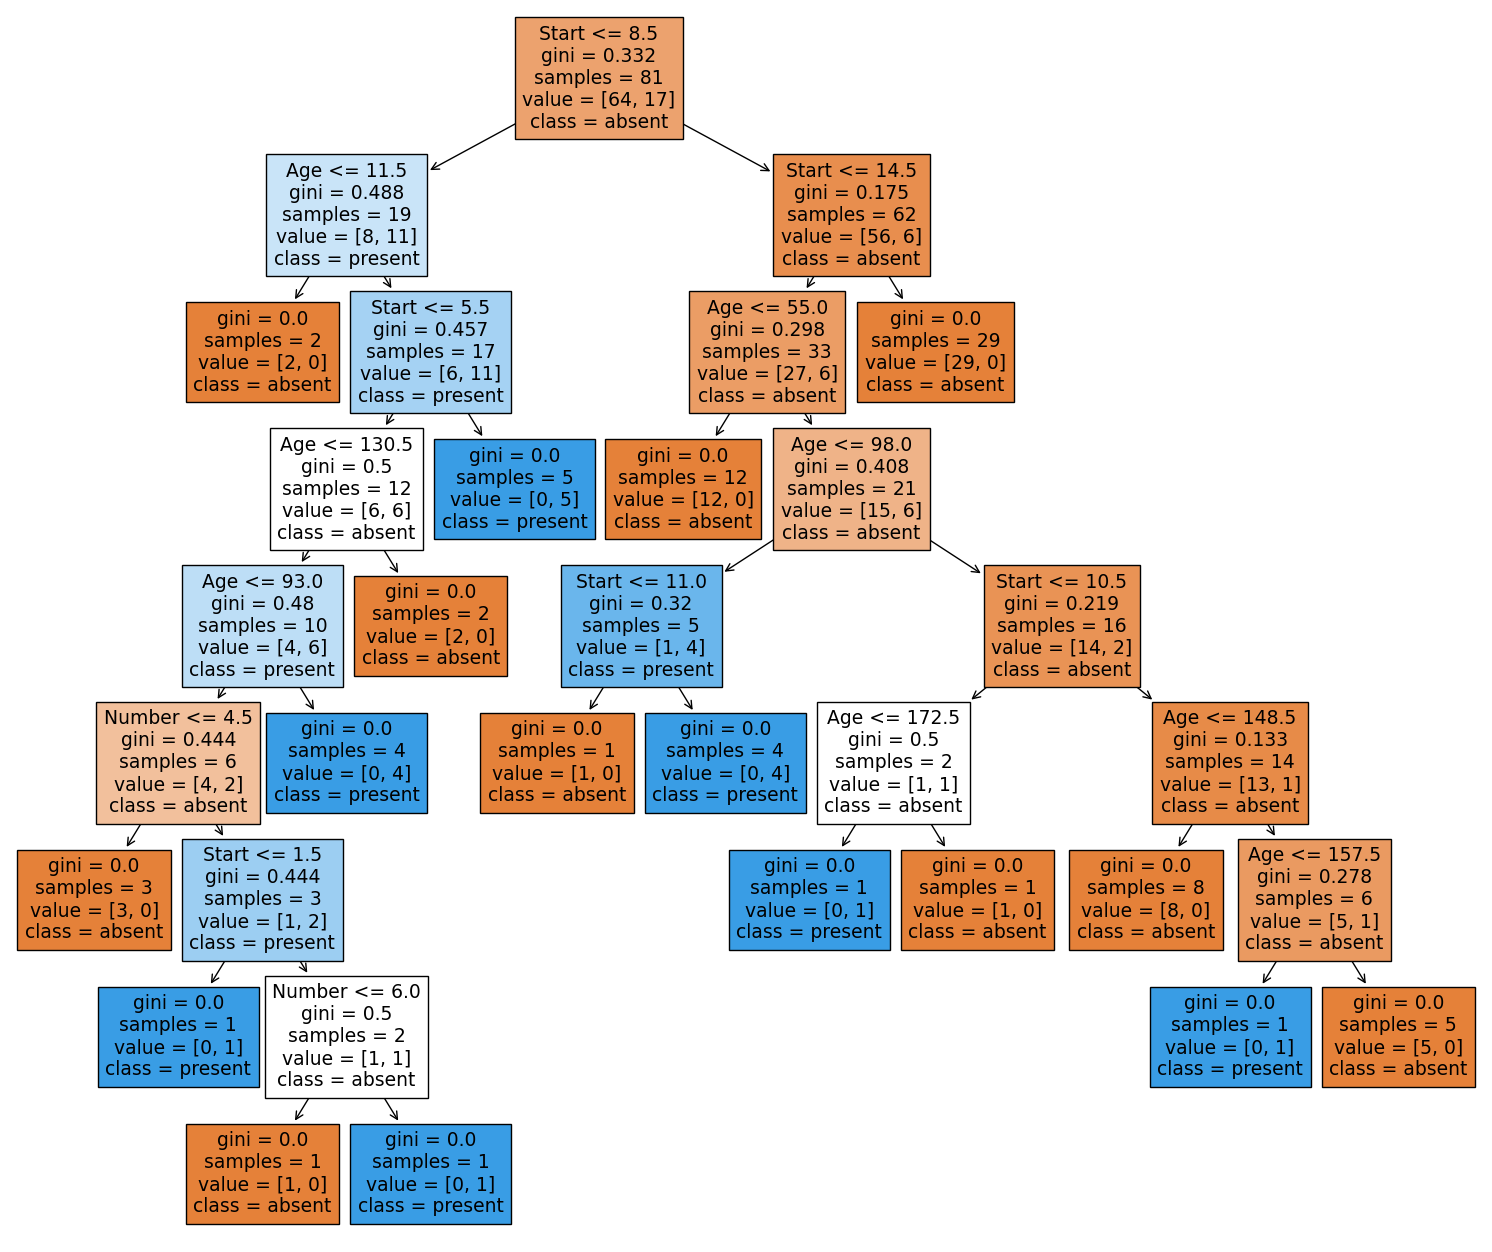

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Mengambil fitur dan target dari DataFrame
j = df.drop('Kyphosis', axis=1)
k = df['Kyphosis']

# Membuat model Decision Tree
clf = DecisionTreeClassifier()
clf.fit(j, k)

# Memvisualisasikan decision tree
plt.figure(figsize=(19,16))
plot_tree(clf, filled=True, feature_names=j.columns, class_names=k.unique())
plt.show()

## Random Forests

Now let's compare the decision tree model to a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[11  3]
 [ 2  1]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.85      0.79      0.81        14
     present       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17



## Feature Importance

Feature importance dalam Random Forest adalah metrik yang mengukur kontribusi relatif dari setiap fitur terhadap kemampuan model untuk membuat prediksi. Ini adalah alat yang sangat berguna dalam pemodelan karena membantu kita memahami mana fitur yang paling penting atau informatif dalam memprediksi target yang kita minati.

In [ ]:
importance = rfc.feature_importances_

In [ ]:
# Membuat DataFrame untuk tabel
feature_importance_df = pd.DataFrame(importance, index=X.columns, columns=['Importance'])

# Mengurutkan berdasarkan pentingnya
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan tabel
print(feature_importance_df_sorted)

        Importance
Start     0.376821
Age       0.329424
Number    0.293755


# Great Job!